In [1]:
from keras.datasets import imdb
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
import numpy as np


np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

Using TensorFlow backend.


In [2]:
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
np.load = np_load_old

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences


In [3]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print(x_train.shape)

Pad sequences (samples x time)
(25000, 500)


In [4]:
model = Sequential()

W0807 09:01:22.057557 139882033858432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [5]:
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

W0807 09:01:22.114654 139882033858432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 09:01:22.134386 139882033858432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 09:01:22.190372 139882033858432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [6]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_split=0.2)

W0807 09:01:24.533514 139882033858432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 09:01:24.542944 139882033858432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0807 09:01:24.550799 139882033858432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0807 09:01:24.883148 139882033858432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 505us/step - loss: 0.6922 - acc: 0.5340 - val_loss: 0.6908 - val_acc: 0.5826
Epoch 2/10
20000/20000 [==============================] - 3s 153us/step - loss: 0.6854 - acc: 0.6796 - val_loss: 0.6847 - val_acc: 0.6272
Epoch 3/10
20000/20000 [==============================] - 3s 152us/step - loss: 0.6698 - acc: 0.7397 - val_loss: 0.6584 - val_acc: 0.7432
Epoch 4/10
20000/20000 [==============================] - 3s 151us/step - loss: 0.6176 - acc: 0.7914 - val_loss: 0.5742 - val_acc: 0.7998
Epoch 5/10
20000/20000 [==============================] - 3s 150us/step - loss: 0.5036 - acc: 0.8278 - val_loss: 0.4547 - val_acc: 0.8268
Epoch 6/10
20000/20000 [==============================] - 3s 151us/step - loss: 0.3890 - acc: 0.8554 - val_loss: 0.3760 - val_acc: 0.8440
Epoch 7/10
20000/20000 [==============================] - 3s 151us/step - loss: 0.3200 - acc: 0.8774 - val_loss: 0.3458 - 

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_acc']
epochs = range(1, len(acc)+1)
print(acc)

[0.53395, 0.6796, 0.7397, 0.7914, 0.8278, 0.85535, 0.87745, 0.89165, 0.90205, 0.91275]


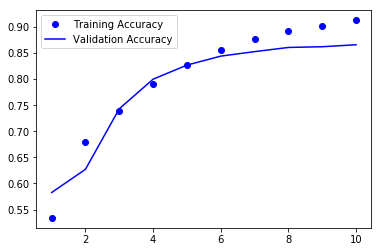

In [8]:
plt.figure()
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.legend()
plt.show()